## Imports
** Import pandas, numpy, matplotlib,and seaborn. **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , LabelEncoder , OrdinalEncoder

## Get the data 
** Read csv and assign balue for dependent and independent variable

In [2]:
cardetails = pd.read_csv("cardetails_cleaned.csv")
cardetails.dropna(inplace = True)
cardetails.head (5)


,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,130000


##  Data Cleaning

** Encoding the categorical variable

In [3]:
categ = ['fuel','seller_type','transmission','owner' , 'name']

# Encode Categorical Columns
le = LabelEncoder()
cardetails[categ] = cardetails[categ].apply(le.fit_transform)


# Removing outliers after observing initial model

*R-squared value was 79 in OLS model. But the residual graphs were not proper, so tried to remove the outliers and standardized the features

In [4]:
cardetails.dtypes

name               int32
year               int64
km_driven          int64
fuel               int32
seller_type        int32
transmission       int32
owner              int32
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
selling_price      int64
dtype: object

In [5]:
Q1 = cardetails['engine'].quantile(0.25)
Q3 = cardetails['engine'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
cardetails[cardetails['engine']> upper_limit]
cardetails[cardetails['engine']< lower_limit]
cardetails = cardetails[cardetails['engine'] < upper_limit]

Q1 = cardetails['max_power'].quantile(0.25)
Q3 = cardetails['max_power'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
cardetails[cardetails['max_power']> upper_limit]
cardetails[cardetails['max_power']< lower_limit]
cardetails = cardetails[cardetails['max_power'] < upper_limit]

In [6]:
Q1 = cardetails['mileage'].quantile(0.25)
Q3 = cardetails['mileage'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
cardetails[cardetails['mileage']> upper_limit]
cardetails[cardetails['mileage']< lower_limit]
cardetails = cardetails[cardetails['mileage'] < upper_limit]

Q1 = cardetails['km_driven'].quantile(0.25)
Q3 = cardetails['km_driven'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
cardetails[cardetails['km_driven']> upper_limit]
cardetails[cardetails['km_driven']< lower_limit]
cardetails = cardetails[cardetails['km_driven'] < upper_limit]

Q1 = cardetails['selling_price'].quantile(0.25)
Q3 = cardetails['selling_price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
cardetails[cardetails['selling_price']> upper_limit]
cardetails[cardetails['selling_price']< lower_limit]
cardetails = cardetails[cardetails['selling_price'] < upper_limit]

# Standardize the data
# Define X and Y

In [7]:
X=cardetails.drop(columns=['torque','selling_price','name'],axis=1)
#X = X.apply(pd.to_numeric , errors = 'coerce')

y=cardetails['selling_price']
#y = y.apply(pd.to_numeric , errors = 'coerce')

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X=scalar.fit_transform(X)



# Find the correlation

In [8]:
correlation = cardetails.corr()
correlation

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
name,1.000000,-0.005571,0.047942,-0.116659,0.043246,-0.031715,0.002748,0.094664,-0.026921,-0.089686,-0.019601,-0.018047
year,-0.005571,1.000000,-0.468048,-0.089423,-0.091232,-0.152872,-0.453563,0.443671,0.092714,0.289751,0.173404,0.727428
km_driven,0.047942,-0.468048,1.000000,-0.347417,0.092787,0.162248,0.349849,-0.096008,0.236824,0.017760,0.023998,-0.332019
fuel,-0.116659,-0.089423,-0.347417,1.000000,0.039891,-0.114823,-0.012257,-0.439274,-0.526348,-0.254155,-0.161120,-0.294322
seller_type,0.043246,-0.091232,0.092787,0.039891,1.000000,0.069103,0.130076,-0.059224,-0.083944,-0.122454,-0.005256,-0.153290
transmission,-0.031715,-0.152872,0.162248,-0.114823,0.069103,1.000000,0.086855,0.046504,-0.036059,-0.123037,0.024878,-0.185166
owner,0.002748,-0.453563,0.349849,-0.012257,0.130076,0.086855,1.000000,-0.200929,0.001466,-0.106580,-0.058439,-0.390386
mileage,0.094664,0.443671,-0.096008,-0.439274,-0.059224,0.046504,-0.200929,1.000000,-0.092882,-0.054663,-0.092900,0.350145
engine,-0.026921,0.092714,0.236824,-0.526348,-0.083944,-0.036059,0.001466,-0.092882,1.000000,0.799610,0.206388,0.399273
max_power,-0.089686,0.289751,0.017760,-0.254155,-0.122454,-0.123037,-0.106580,-0.054663,0.799610,1.000000,0.170736,0.581425


#  Splitting the dataset into the Training set and Test set
** Fit the training data in  linear regression using sklearn library

** Fit the training data in ols using statmodels

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression

#modeling_pipeline = Pipeline([('data_processing', preprocessor), ('lm', LinearRegression())])
modeling_pipeline = LinearRegression()
modeling_pipeline.fit(X_train , y_train)


LinearRegression()

In [11]:
y_pred = modeling_pipeline.predict(X_test)
modeling_pipeline.score (X_train , y_train)


0.7304269831352856

In [12]:

from sklearn.metrics import r2_score, mean_squared_error ,confusion_matrix,classification_report,matthews_corrcoef,accuracy_score
accuracy = r2_score(y_test,y_pred )
print(accuracy)

0.7353760826812745


## Stats Models
** fit x and y to Oridinary least square 

In [13]:
import statsmodels.api as smf

simpleOLSModel = smf.OLS(y_train , X_train).fit()
print(simpleOLSModel.summary())

                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              6027.
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                        0.00
Time:                        21:09:03   Log-Likelihood:                         -53538.
No. Observations:                4092   AIC:                                  1.071e+05
Df Residuals:                    4082   BIC:                                  1.072e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

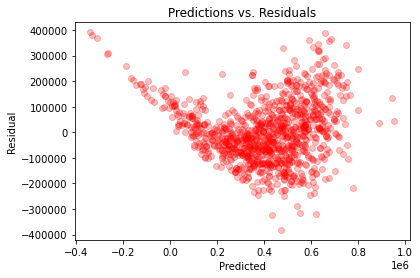

In [41]:
y_pred_ols = simpleOLSModel.predict(X_test)
resid = y_test - ypred

plt.plot(ypred, resid, 'ro', alpha=0.25)
#plt.hlines(0,0,60)
#plt.xlim()
plt.title('Predictions vs. Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

In [42]:
accuracy_ols = r2_score(y_test,y_pred_ols )
print(accuracy_ols)

0.733335507450934


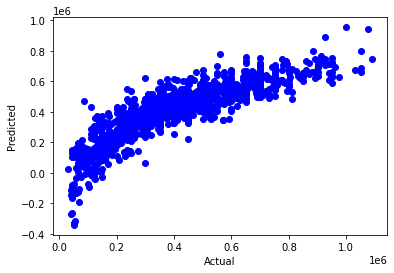

In [43]:
plt.plot(y_test, ypred, 'bo')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

### Overall R-squared value is 97% on Training data, 73% on Test data.
** Graph looks somewhat linear , not  overfitting or underfitting
** But the residual and predicted graph alarms


# Lasso Regularization with different lambda value


In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [45]:
from collections import defaultdict
alphas = [0, 1, 2, 5, 10, 50]

ridge_results = defaultdict(dict)

for alph in alphas:
    modeling_pipeline_ridge = Pipeline([('ridge', Ridge(alpha=alph))])
    modeling_pipeline_ridge.fit(X_train, y_train)
    ridge_results['coefficients'][alph] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][alph] = modeling_pipeline_ridge.score(X_train, y_train)
    ridge_results['test score'][alph] = modeling_pipeline_ridge.score(X_test, y_test)
    
print('Finished')

Finished


## Changes in Coefficient values

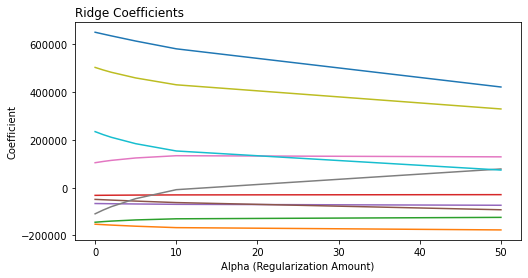

In [46]:
coefficients = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients = coefficients.reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(8,4),legend=False)
)

plt.title('Ridge Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
#plt.ylim((-10, 10))
plt.show()

## changes in r2 value

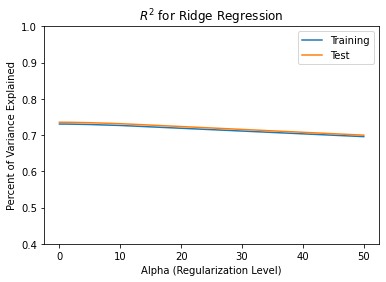

In [47]:

ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])

ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.ylim(0.4, 1)
plt.show()



In [48]:
accuracy_ridge = r2_score(y_test,y_pred_ridge )
print(accuracy_ridge)

0.7341525792886412


### I dont see an increase in r2 score value using Lasso with any alpha value , but with more penalty (50). r2 score got reduced

## Lasso regression 

In [49]:
from sklearn.linear_model import Lasso
from collections import defaultdict

alphas = [1, 2, 5, 10, 50]

lasso_results = defaultdict(dict)

for alph in alphas:
    modeling_pipeline_lasso = Pipeline([ ('lasso', Lasso(alpha=alph))])
    modeling_pipeline_lasso.fit(X_train, y_train)
    lasso_results['coefficients'][alph] = modeling_pipeline_lasso['lasso'].coef_
    lasso_results['training score'][alph] = modeling_pipeline_lasso.score(X_train, y_train)
    lasso_results['test score'][alph] = modeling_pipeline_lasso.score(X_test, y_test)
    
print('Finished')



Finished


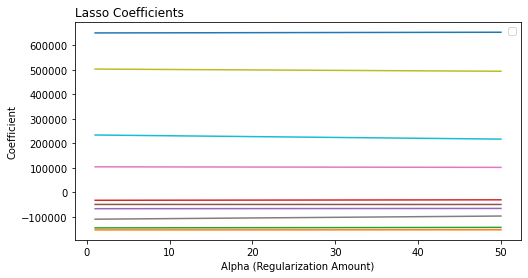

In [50]:
coefficients = pd.DataFrame.from_dict(lasso_results['coefficients'])
coefficients = coefficients.reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient').plot(figsize=(8,4))
plt.title('Lasso Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.legend('')
plt.show()

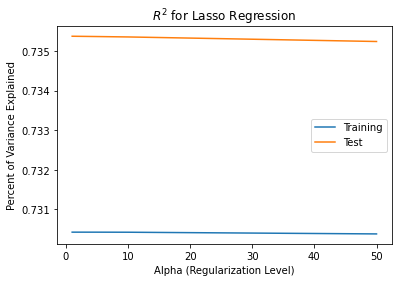

In [51]:
lasso_training_r2 = pd.Series(lasso_results['training score'])
lasso_test_r2 = pd.Series(lasso_results['test score'])

lasso_training_r2.plot()
lasso_test_r2.plot()
plt.title('$R^2$ for Lasso Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.show()

In [54]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=50)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [55]:
accuracy_lasso = r2_score(y_test,y_pred_lasso )
print(accuracy_lasso)

0.7352416535087434
